#Archisha Sinha

##Domain: Computer Vision
##Topic: SURF Key Point Descriptor

## Experiment 4: Determine Corners Key Points of the given Image and match them with same image but taken from differnt angle and then make the image aligned usinf SURF

Task 1: identify key points and corresponding descriptors in the given reference image

Task 2: resize the image

Task 3: rotate the image

Task 4: identify key points and corresponding descriptors in scaled and rotated images

Task 5: determine homography matrix to determine the relation between reference and modified images

Task 6: Use homography matrix to warp modified images

Task 7: Click two pictures of a scene in two different directions and apply the above steps to align images

##Task 1: identify key points and corresponding descriptors in the given reference image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Proper front Image

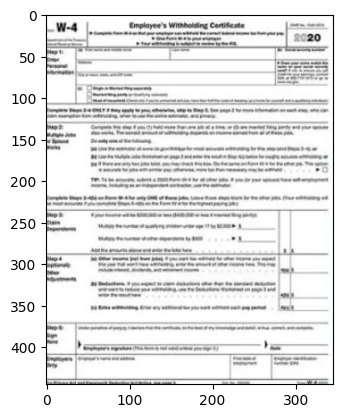

In [2]:
image1 = cv2.imread('/content/page1 1.JPG')
plt.imshow(image1)

Image taken from different angle

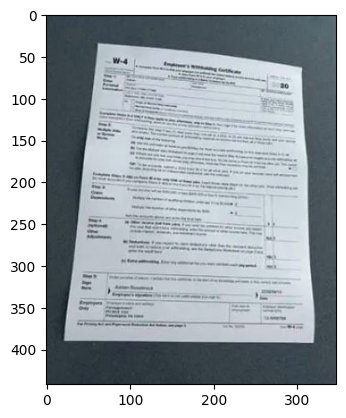

In [3]:
image2 = cv2.imread('/content/page2 1.JPG')
plt.imshow(image2)

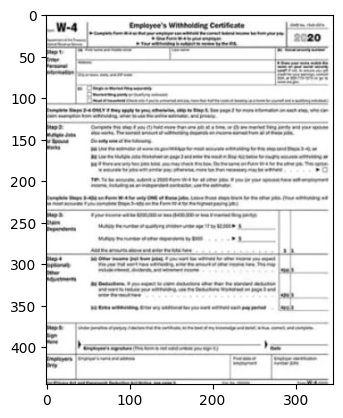

In [4]:
image1_color = cv2.imread('/content/page1 1.JPG')
image1_g = cv2.cvtColor(image1_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image1_g, cmap='gray')

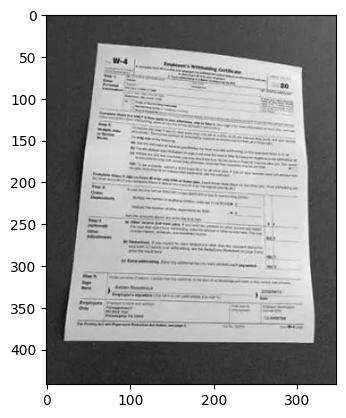

In [5]:
image2_color = cv2.imread('/content/page2 1.JPG')
image2_g = cv2.cvtColor(image2_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image2_g, cmap='gray')

In [7]:
[rw,cd] = image1_g.shape
rw,cd

(445, 346)

In [8]:
# orb = cv2.ORB_create(500)  #other type of detector which detects the key points and their corresponding detector. 500 states the top 500 key points.
# k1,d1 = orb.detectAndCompute(image1_g, None)
# k2,d2 = orb.detectAndCompute(image2_g, None)

In [9]:
# d1.shape

(489, 32)

there are 489 key points and each descriptor has 32 as the length of vector in image 1

In [10]:
# d2.shape

(454, 32)

there are 454 key points and each descriptor has 32 as the length of vector in image 2

In [20]:
#other type of detector which detects the key points and their corresponding detector.
orb = cv2.ORB_create(450)  #450 states the top 450 key points.
k1,d1 = orb.detectAndCompute(image1_g, None)
k2,d2 = orb.detectAndCompute(image2_g, None)

In [21]:
d1.shape

(443, 32)

In [22]:
d2.shape

(411, 32)

In [17]:
# orb = cv2.ORB_create(350)
# k1,d1 = orb.detectAndCompute(image1_g, None)
# k2,d2 = orb.detectAndCompute(image2_g, None)

In [18]:
# d1.shape

(349, 32)

In [19]:
# d2.shape

(325, 32)

number of key points are subject to the number of total key points which are required in total.

In [23]:
m = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = m.match(d2,d1)
matches = sorted(matches, key = lambda x:x.distance)

In [24]:
good_matches = int(len(matches)*0.1)
matches = matches[:good_matches]

In [25]:
print(good_matches)

41


In [26]:
points1 = np.zeros((good_matches,2))
points2 = np.zeros((good_matches,2))
for i in range(good_matches):
  points2[i:] = k2[matches[i].queryIdx].pt
  points1[i:] = k1[matches[i].trainIdx].pt

In [27]:
points1.shape

(41, 2)

In [28]:
points2.shape

(41, 2)

In [29]:
H,mask = cv2.findHomography(points2, points1, cv2.RANSAC)

RANSAC: Similar to DBSCAN, but it checks for outliers and efficient in removing them.

In [30]:
img_aligned = cv2.warpPerspective(image2_color, H, (cd,rw))

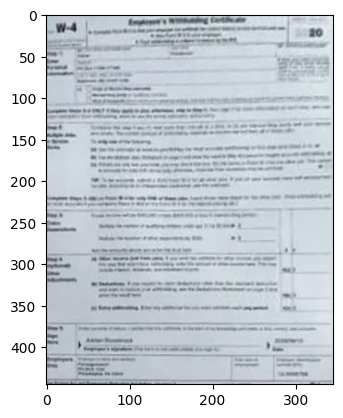

In [31]:
plt.imshow(img_aligned)

Text(0.5, 1.0, 'Aligned Image')

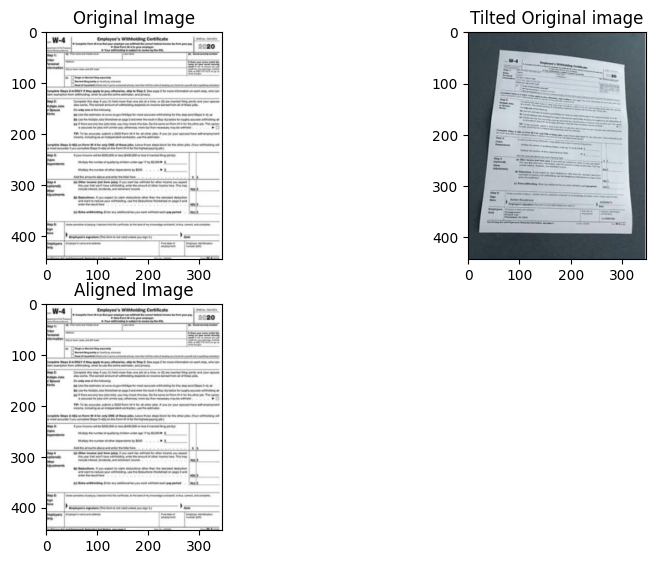

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(image1, cmap='gray')
plt.title("Original Image")
plt.subplot(3,2,2)
plt.imshow(image2, cmap='gray')
plt.title("Tilted Original image")
plt.subplot(3,2,3)
plt.imshow(image1, cmap='gray')
plt.title("Aligned Image")

##Task 2: resize the image

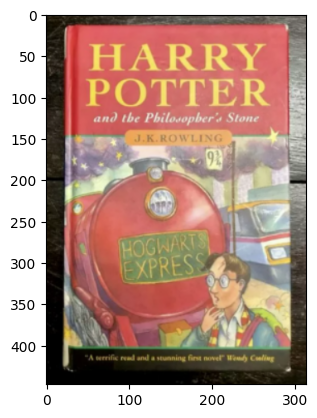

In [33]:
img1 = cv2.imread('/content/Screenshot 2024-09-12 122452.png')
plt.imshow(img1)

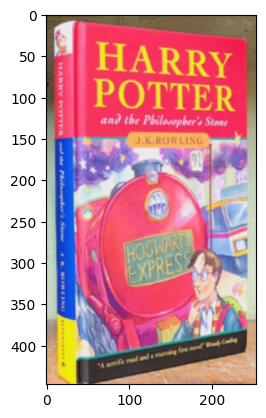

In [34]:
img2 = cv2.imread('/content/Screenshot 2024-09-12 122504.png')
plt.imshow(img2)

In [35]:
orb = cv2.ORB_create(400)
k1,d1 = orb.detectAndCompute(img1, None)
k2,d2 = orb.detectAndCompute(img2, None)

In [36]:
d1.shape

(400, 32)

In [37]:
d2.shape

(385, 32)

In [38]:
m = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = m.match(d2,d1)
matches = sorted(matches, key = lambda x:x.distance)

In [39]:
good_matches = int(len(matches)*0.1)
matches = matches[:good_matches]

In [40]:
print(good_matches)

38


In [41]:
points1 = np.zeros((good_matches,2))
points2 = np.zeros((good_matches,2))
for i in range(good_matches):
  points2[i:] = k2[matches[i].queryIdx].pt
  points1[i:] = k1[matches[i].trainIdx].pt

In [42]:
points1.shape

(38, 2)

In [43]:
points2.shape

(38, 2)

In [44]:
H,mask = cv2.findHomography(points2, points1, cv2.RANSAC)

In [45]:
img_aligned = cv2.warpPerspective(img2, H, (cd,rw))

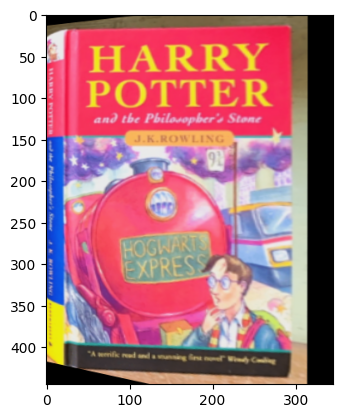

In [46]:
plt.imshow(img_aligned)

Text(0.5, 1.0, 'Aligned Image')

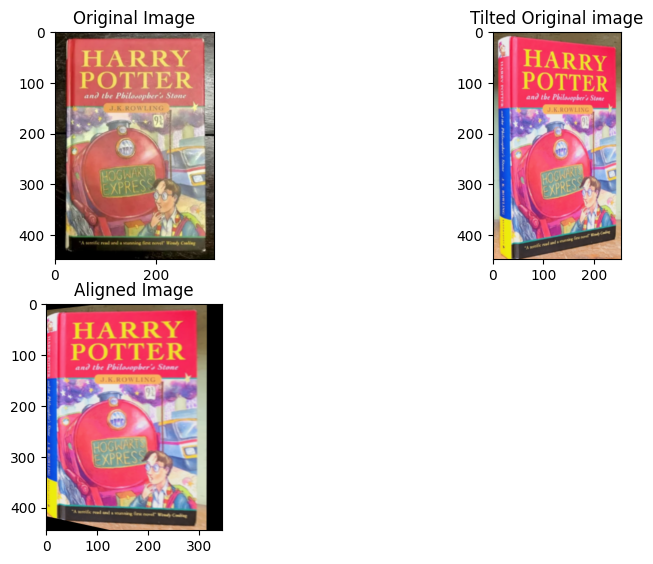

In [47]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(img1, cmap='gray')
plt.title("Original Image")
plt.subplot(3,2,2)
plt.imshow(img2, cmap='gray')
plt.title("Tilted Original image")
plt.subplot(3,2,3)
plt.imshow(img_aligned, cmap='gray')
plt.title("Aligned Image")

#Conclusion:
* ORB detector is used to determine key points and their corresponding descriptors in ref image and image to be aligned.
* Brute Force Matcher is used to match the key points
* Homography matrix is generated using locations of key points of two images, shows the mathematical relation between key points of two images.
* HM is used to warp(unalign) the image to be aligned. When the aligned image shows that ref iamge and warped image are similar.
* For the above process 450 key points were used in task 1, and top  % strongest matches were considered to generate x matches.
* Above algo is applied on the other two images which requires 41 key points and % of strongest matches to get aligned image.